## Jiade Song 
### USCID 9019610285

#### 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
hitters_df1 = pd.read_csv('Hitters.csv')
hitters_df2 = hitters_df1.dropna()
hitters_df2

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [5]:
hitters_df3 = pd.get_dummies(hitters_df2,columns=['League',\
            'Division','NewLeague'],drop_first = True)

In [6]:
X = hitters_df3.drop('Salary',axis =1)
y = hitters_df3.Salary

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                 random_state=1)

##### a)

In [8]:
bag100 = RandomForestRegressor(max_features=10,
                                      max_depth=4,
                                      n_estimators = 100,
                                      random_state=1)
bag100.fit(X_train,y_train);

In [9]:
pred1 = bag100.predict(X_test)
mean_squared_error(y_test,pred1)

68131.15084249043

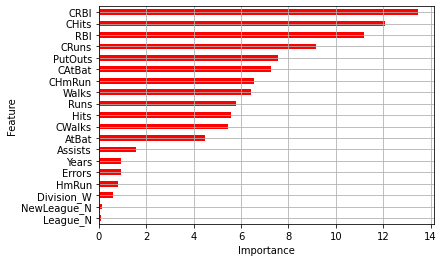

In [10]:
Importance1 = pd.DataFrame({'Importance':bag100.feature_importances_*100},
                          index = X.columns)
df0 = Importance1.sort_values(by = 'Importance',axis = 0,
                             ascending = True)
df0.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

The test MSE is 68131.
The three most important predictors are CRBI, CHits and RBI. 

##### b)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
gbrt1 = GradientBoostingRegressor(n_estimators = 100, 
                                    learning_rate = 0.1,
                                    max_depth = 4, 
                                    random_state =1)
gbrt1.fit(X_train,y_train);

In [13]:
pred2 = gbrt1.predict(X_test)
mean_squared_error(y_test,pred2)

91944.13227645963

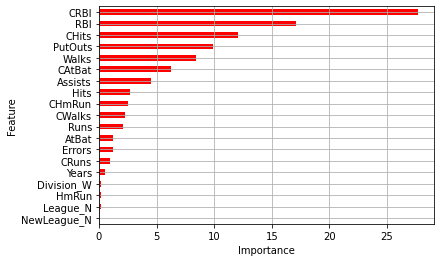

In [14]:
Importance2 = pd.DataFrame({'Importance':gbrt1.feature_importances_*100},
                          index = X.columns)
df1 = Importance2.sort_values(by = 'Importance',axis = 0,
                             ascending = True)
df1.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

The test MSE is 91944.
The three most important predictors are CRBI, RBI and CHits. 

##### c) 

The two most important predictors found by the Random Forest are CRBI and CHits. 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
X0_test = X_test[['CRBI','CHits']]
X0_train = X_train[['CRBI','CHits']]

In [17]:
mlr = LinearRegression().fit(X0_train,y_train)

In [18]:
pred3 = mlr.predict(X0_test)
mean_squared_error(y_test,pred3)

120888.60550182406

The test MSE is 120889. 

#### 2.

##### a)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
Caravan_df1 = pd.read_csv('Caravan.csv')

In [21]:
Caravan_df2 = Caravan_df1.drop(columns=['PVRAAUT','AVRAAUT'])

In [22]:
Caravan_df2.dtypes

MOSTYPE      int64
MAANTHUI     int64
MGEMOMV      int64
MGEMLEEF     int64
MOSHOOFD     int64
             ...  
APLEZIER     int64
AFIETS       int64
AINBOED      int64
ABYSTAND     int64
Purchase    object
Length: 84, dtype: object

In [23]:
X1 = Caravan_df2.drop('Purchase',axis =1)
y1 = Caravan_df2.Purchase

In [24]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,train_size=0.4,
                                                 random_state=1)

In [25]:
bag_model = RandomForestClassifier(max_features = 29,
                                   max_depth = 4,
                                   n_estimators = 500,
                                   random_state=1)
bag_model.fit(X1_train,y1_train);

In [26]:
pred4 = bag_model.predict(X1_test)
bag_model.score(X1_test,y1_test)

0.9398969662278192

In [27]:
bag_model.feature_importances_;

In [28]:
df2 = pd.DataFrame(bag_model.feature_importances_*100,
                   index = X1_train.columns,
                   columns = ['Importance'])
df3 = df2.sort_values(by='Importance', ascending=False)
df3[:5]

,Importance
PPERSAUT,14.586913
APERSAUT,6.763867
PPLEZIER,5.899278
PBRAND,4.515780
MOPLHOOG,3.591568


The three most important predictors are PPERSAUT, APERSAUT and PPLEZIER. The test accuracy rate is 0.940.

##### b)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
gbc = GradientBoostingClassifier(n_estimators = 1000,
                                 learning_rate = 0.01,
                                 max_depth = 4, random_state =1)
gbc.fit(X1_train,y1_train);

In [31]:
pred5 = gbc.predict(X1_test)
gbc.score(X1_test,y1_test)

0.9341728677733258

In [32]:
gbc.feature_importances_;

In [33]:
df4 = pd.DataFrame(gbc.feature_importances_*100,
                   index = X1_train.columns,
                   columns = ['Importance'])
df5 = df4.sort_values(by='Importance', ascending=False)
df5[:5]

,Importance
PPERSAUT,11.527997
MOPLHOOG,5.211675
PPLEZIER,4.763528
PBRAND,4.596692
APERSAUT,4.032995


The three most important predictors are PPERSAUT, MOPLHOOG and PPLEZIER. The test accuracy rate is 0.934.

##### c)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
scaler.fit(X1_train);

In [36]:
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [37]:
loRe = LogisticRegression(solver = 'lbfgs',max_iter=900,random_state =1)
loRe.fit(X1_train_scaled,y1_train)
yhat1 = loRe.predict(X1_test_scaled)
loRe.score(X1_test_scaled,y1_test)

0.9393245563823698

The test accuracy rate is 0.939.